# Lecture 5
### Grant White

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

In [2]:
from pylab import *
from scipy.special import factorial

In [3]:
# Code from GitHub.
def fdcoeffV(k,xbar,x):
    x = array(x)  # in case a list or tuple passed in, convert to numpy array
    n = len(x)
    if k >=n:
        raise ValueError('*** len(x) must be larger than k')
        
    A = ones((n,n))
    xrow = x - xbar  # displacement vector
    
    for i in range(1,n):
        A[i,:] = (xrow**i) / factorial(i)
    
    condA = cond(A)  # condition number
    if condA > 1e8:
        print("Warning: condition number of Vandermonde matrix is approximately %.1e" % condA)
        
    b = zeros(x.shape)
    b[k] = 1.
    
    c = solve(A,b)
    
    return c

def fdstencil(k, jbar, stencil_points):
    """
    Compute and print the finite difference stencil for an order k derivative
    using at least k+1 equally spaced points.
    The stencil_points are thus assumed to be integers (indices of stencil points)
    as is jbar, the index at which the approximation is to be used.
    
    For example, the standard second order stencil for u''(x_0) 
    can be printed via
        fdstencil(2, 0, [-1,0,1])
    """
    assert type(jbar) is int, '*** jbar should be an integer'
    stencil_pts = array(stencil_points)
    assert stencil_pts.dtype == int, '*** stencil_points should be integers'
    
    c = fdcoeffV(k, jbar, stencil_pts)
    
    print("Stencil for approximation to order %s derivative at U_{%s} is:" \
          % (str(k), str(jbar)))
    coeffs = ['%s / h^2' % str(cj) for cj in c]
    s = '[' 
    for j in range(len(c)):
        subj = str(stencil_pts[j])
        cj = c[j]
        sj = '%g U_{%s}' % (abs(cj), stencil_pts[j])
        if cj >= 0:
            s = s + ' + ' + sj
        else:
            s = s + ' - ' + sj
    s = s + '] / h^%i' % k
    print(s)
    return c

In [4]:
fdstencil(2, 0, [-2, -1, 0, 1, 2])

Stencil for approximation to order 2 derivative at U_{0} is:
[ - 0.0833333 U_{-2} + 1.33333 U_{-1} - 2.5 U_{0} + 1.33333 U_{1} - 0.0833333 U_{2}] / h^2


array([-0.08333333,  1.33333333, -2.5       ,  1.33333333, -0.08333333])

In [5]:
fdstencil(2, 0, [-1, 0, 1, 2, 3])

Stencil for approximation to order 2 derivative at U_{0} is:
[ + 0.916667 U_{-1} - 1.66667 U_{0} + 0.5 U_{1} + 0.333333 U_{2} - 0.0833333 U_{3}] / h^2


array([ 0.91666667, -1.66666667,  0.5       ,  0.33333333, -0.08333333])

In [6]:
fdstencil(2, 0, [0, 1, 2, 3, 4])

Stencil for approximation to order 2 derivative at U_{0} is:
[ + 2.91667 U_{0} - 8.66667 U_{1} + 9.5 U_{2} - 4.66667 U_{3} + 0.916667 U_{4}] / h^2


array([ 2.91666667, -8.66666667,  9.5       , -4.66666667,  0.91666667])

In [7]:
fdstencil(2, 0, [-3, -2, -1, 0, 1])

Stencil for approximation to order 2 derivative at U_{0} is:
[ - 0.0833333 U_{-3} + 0.333333 U_{-2} + 0.5 U_{-1} - 1.66667 U_{0} + 0.916667 U_{1}] / h^2


array([-0.08333333,  0.33333333,  0.5       , -1.66666667,  0.91666667])

In [8]:
def bvp_order(sigma, beta, fun, N=20, order=2):
    """
    u''(x) = f(x), x in [0,1]
    u'(0) = sigma, u(1) = beta
    """
    
    #initialize x
    h = 1 / N
    x = np.linspace(0, 1, N+1)
    
    #second order
    if order == 2:
        #make A
        one = np.ones(N+1)
        A = (np.diag(one, -1) - 2*np.eye(N+2) + np.diag(one, 1))
        A[0, :3] = [-3*h/2, 2*h, -h/2]
        A[-1, -2:] = [0, h**2]
        A /= h**2

        #make F
        F = np.concatenate((fun(x), [beta]))
        F[0] = sigma
        
    #forth order
    if order == 4:
        x = x[:-1]
        #make A
        A = -1/12*np.diag(np.ones(N-2), -2) + \
            +4/3*np.diag(np.ones(N-1), -1) + \
            -5/2*np.eye(N) + \
            +4/3*np.diag(np.ones(N-1), 1) + \
            -1/12*np.diag(np.ones(N-2), 2)
#         A[1, :5] = [11/12, -5/3, 1/2, 1/3, -1/12]
#         A[0, :5] = [35/12*h, -26/3*h, 19/2*h, -14/3*h, 11/12*h]
#         A[-2, -5:] = [-1/12, 1/3, 1/2, -5/3, 11/12]
#         A[-1, -2:] = [0, h**2]
        A /= h**2

        #make F
        F = np.concatenate(([sigma], fun(x[1:-1]), [beta]))
    
    #solve
    V = np.linalg.solve(A, F)
    
    return x, V

In [9]:
#function
f = lambda x: -np.pi**2*np.sin(np.pi * x)
u = lambda x: np.sin(np.pi * x)
domain = np.linspace(0, 1)

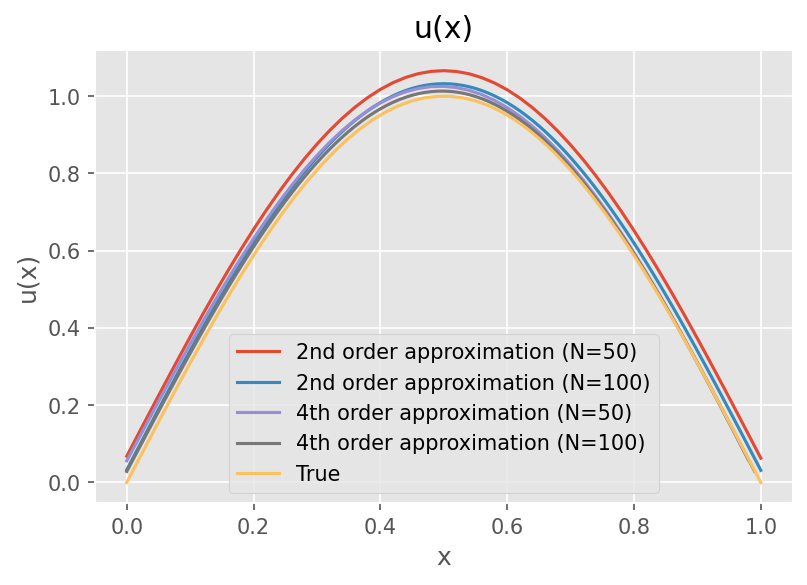

In [10]:
#solve
Ns = 50
Nb = 100
x2s, V2s = bvp_order(np.pi, 0, f, Ns, 2)
x2b, V2b = bvp_order(np.pi, 0, f, Nb, 2)
x4s, V4s = bvp_order(np.pi, 0, f, Ns, 4)
x4b, V4b = bvp_order(np.pi, 0, f, Nb, 4)

#plot
plt.title('u(x)')
plt.plot(x2s, V2s[:-1], label='2nd order approximation (N=50)')
plt.plot(x2b, V2b[:-1], label='2nd order approximation (N=100)')
plt.plot(x4s, V4s, label='4th order approximation (N=50)')
plt.plot(x4b, V4b, label='4th order approximation (N=100)')
plt.plot(domain, u(domain), label='True')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()

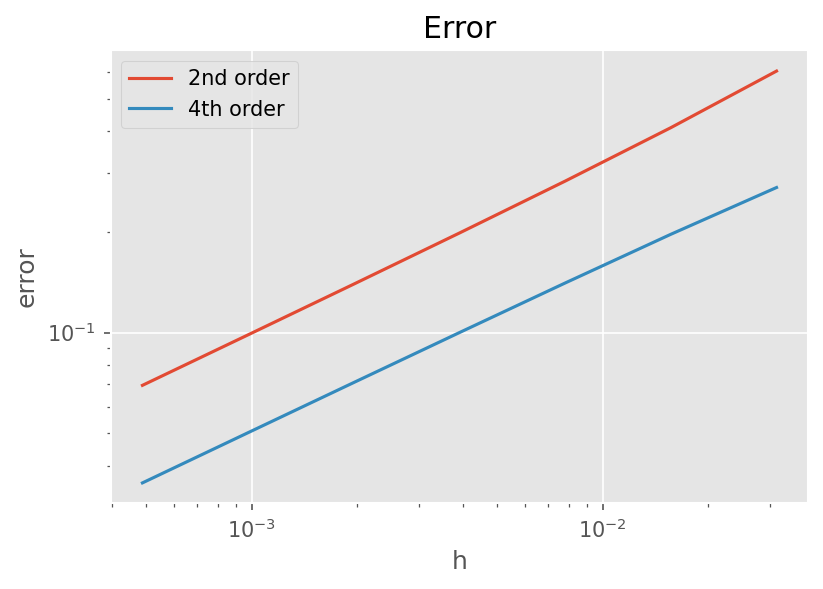

In [11]:
#initialize
H = []
Err2 = []
Err4 = []

#make h smaller
for i in range(5, 12):
    n = 2**i
    H.append(1 / n)
    
    #second order
    x2, V2 = bvp_order(np.pi, 0, f, n, 2)
    true = u(x2)
    Err2.append(np.linalg.norm(V2[:-1] - true))

    #forth order
    x4, V4 = bvp_order(np.pi, 0, f, n, 4)
    true = u(x4)
    Err4.append(np.linalg.norm(V4 - true))
    
#plot
plt.title('Error')
plt.loglog(H, Err2, label='2nd order')
plt.loglog(H, Err4, label='4th order')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.show()